In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from xml.etree import ElementTree
import requests

pd.set_option('display.max_rows',43000)
plt.rc('font', family='NanumBarunGothic') 

In [4]:
path = '/content/drive/MyDrive/빅콘/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_데이터_210803/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx'
usd_path = '/content/drive/MyDrive/빅콘/USD_KRW 내역.csv'

## 기본 데이터 셋

In [5]:
df = pd.read_excel(path)
df.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


- 결측값 X
- 10 columns
- REG_DATE(dateime)
- P_PRICE(float64)
- 제외하고 object

In [6]:
print("IS NA:\n",df.isna().sum(),'\n')
df.info()

IS NA:
 REG_DATE         0
P_TYPE           0
CTRY_1           0
CTRY_2           0
P_PURPOSE        0
CATEGORY_1       0
CATEGORY_2       0
P_NAME           0
P_IMPORT_TYPE    0
P_PRICE          0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42073 entries, 0 to 42072
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       42073 non-null  datetime64[ns]
 1   P_TYPE         42073 non-null  object        
 2   CTRY_1         42073 non-null  object        
 3   CTRY_2         42073 non-null  object        
 4   P_PURPOSE      42073 non-null  object        
 5   CATEGORY_1     42073 non-null  object        
 6   CATEGORY_2     42073 non-null  object        
 7   P_NAME         42073 non-null  object        
 8   P_IMPORT_TYPE  42073 non-null  object        
 9   P_PRICE        42073 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.2

In [7]:
print(df.REG_DATE.min(), '~' ,df.REG_DATE.max())

2015-12-28 00:00:00 ~ 2019-12-30 00:00:00


In [8]:
df.describe(include='all')

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
count,42073,42073,42073,42073,42073,42073,42073,42073,42073,42073.000000
unique,210,1,87,88,5,7,113,286,78,NaN
top,2017-09-25 00:00:00,수산물,중국,중국,판매용,어류,새우,흰다리새우,냉동,NaN
freq,255,42073,11029,12008,39278,21339,4141,2601,13568,NaN
first,2015-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.545346
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.914624
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.203770
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.654165


# 수출국 제조국

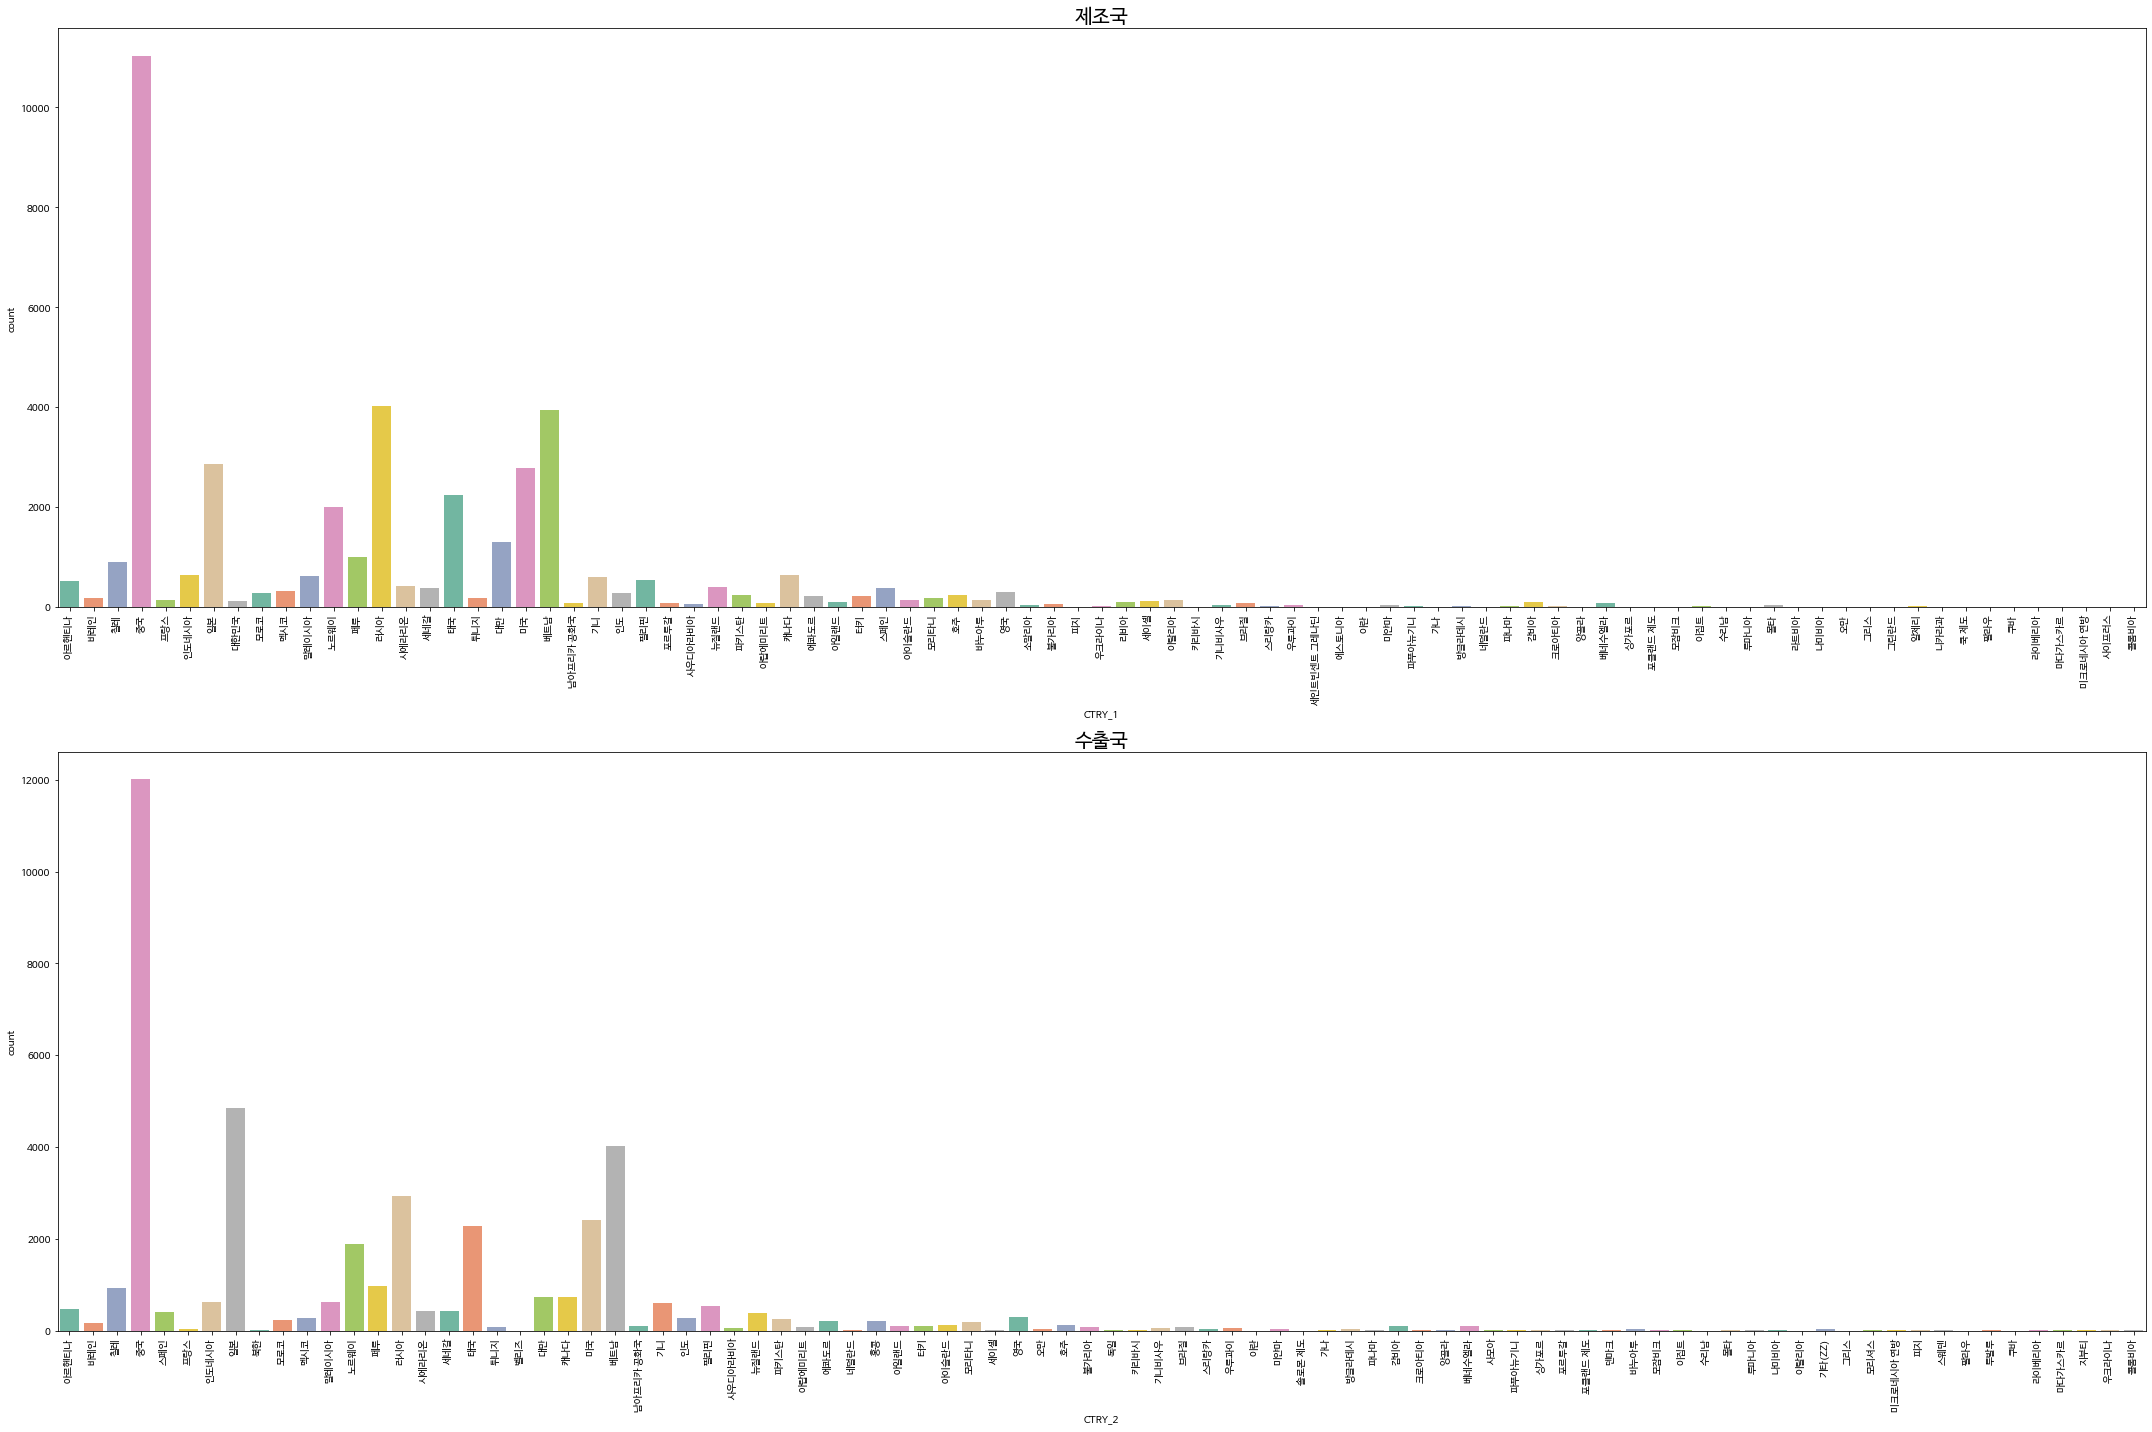

In [9]:
plt.figure(figsize=(30, 20))
plt.subplot(2, 1, 1)
sns.countplot(df['CTRY_1'], palette='Set2')
plt.xticks(rotation = 90, fontsize=10)
plt.title('제조국', fontsize=20)

plt.subplot(2, 1, 2)
sns.countplot(df['CTRY_2'], palette='Set2')
plt.xticks(rotation = 90, fontsize=10)
plt.title('수출국', fontsize=20)

plt.tight_layout()
plt.show()

In [10]:
print('CTRY_1 :',df['CTRY_1'].nunique(), '\nCTRY_2 :',df['CTRY_2'].nunique())

CTRY_1 : 87 
CTRY_2 : 88


In [11]:
ctry_1 = df['CTRY_1']
ctry_2 = df['CTRY_2']
set1 = set(ctry_1)
set2 = set(ctry_2)

set1_diff = set1.difference(set2)
print('Set_1 Diff :',set(set1_diff))

set2_diff = set2.difference(set1)
print('Set_2 Diff :',set(set2_diff))

Set_1 Diff : {'에스토니아', '니카라과', '세인트빈센트 그레나딘', '대한민국', '라트비아', '사이프러스', '그린란드', '소말리아', '쿡 제도', '리비아', '알제리'}
Set_2 Diff : {'사모아', '모리셔스', '투발루', '스웨덴', '솔로몬 제도', '독일', '벨리즈', '지부티', '덴마크', '기타(ZZ)', '홍콩', '북한'}


# 수입 용도

In [12]:
df['P_PURPOSE'].value_counts()

판매용         39278
자사제품제조용      1726
외화획득용 원료      911
합작            144
반송품(기타)        14
Name: P_PURPOSE, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

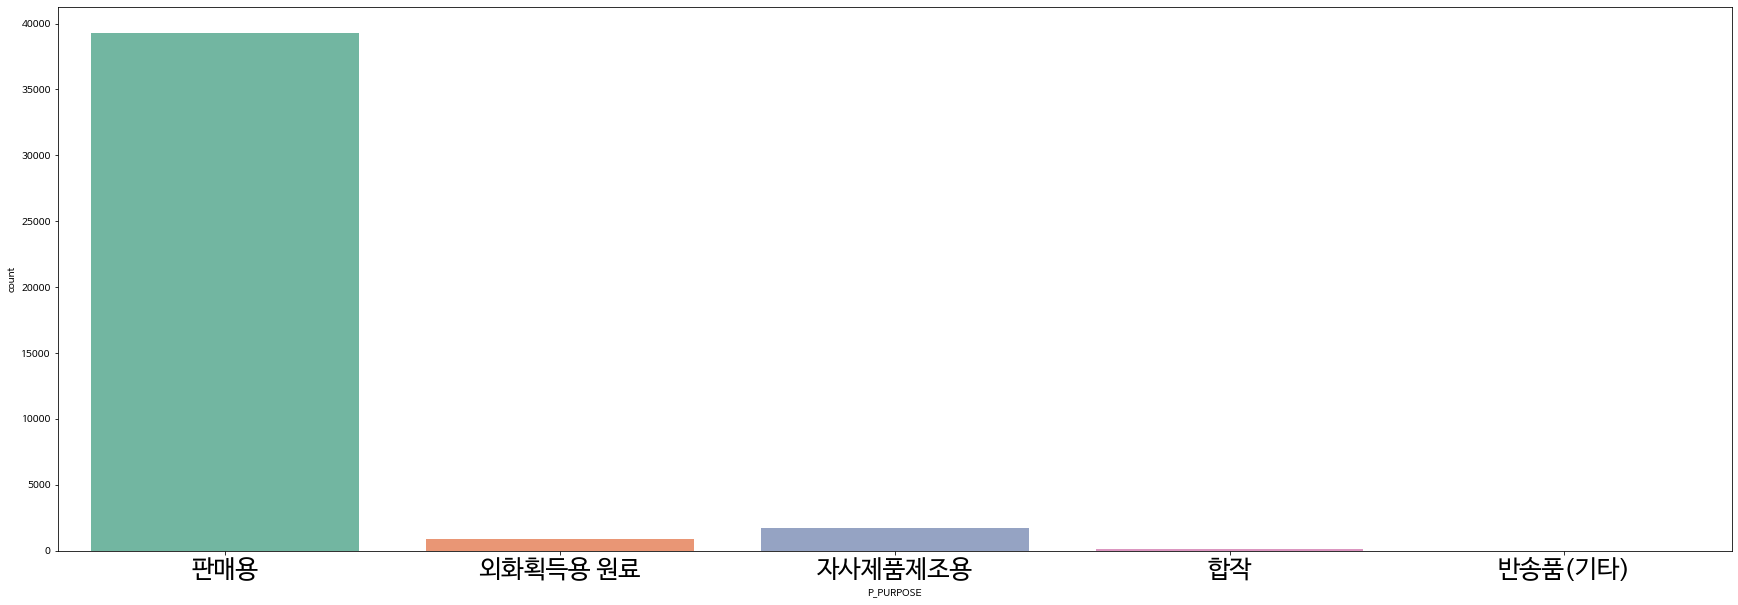

In [13]:
plt.figure(figsize=(30, 10))
sns.countplot(df['P_PURPOSE'], palette='Set2')
plt.xticks(fontsize=25)

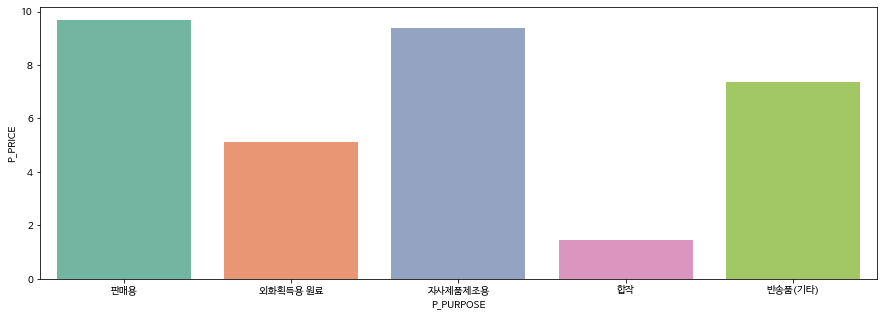

In [14]:
plt.figure(figsize=(15, 5))
sns.barplot(x='P_PURPOSE', y = 'P_PRICE', data=df, palette='Set2', ci=None)

# CATEGORY_1

In [15]:
df.CATEGORY_1.value_counts()

어류             21339
갑각류             7298
연체류 해물모듬        6772
패류 멍게류          5097
알 곤이류           1037
젓갈류 해조류 해파리      467
기타 수입식품           63
Name: CATEGORY_1, dtype: int64

In [16]:
df.CATEGORY_1.describe()

count     42073
unique        7
top          어류
freq      21339
Name: CATEGORY_1, dtype: object

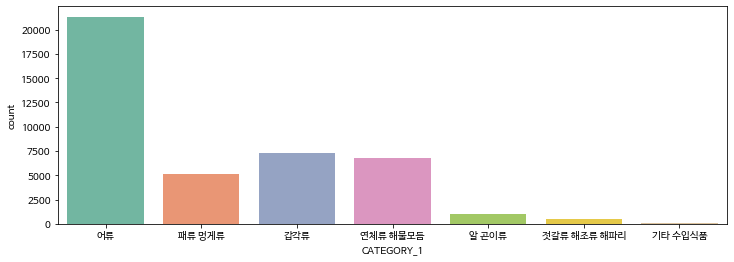

In [17]:
plt.figure(figsize=(12,4))

sns.countplot(df.CATEGORY_1.sort_index(ascending=False), palette='Set2')

# CATEGORY_2

In [18]:
df.CATEGORY_2.value_counts()

새우             4141
참치 새치류         3159
오징어            2662
게              2477
연어             1905
명태             1640
낙지             1617
조개 백합 대합       1435
대구             1325
쭈꾸미            1141
장어             1093
가자미            1022
도미 감성돔 돔류      1012
갈치              952
조기 보구치 강다리      912
가오리             803
갑오징어            783
홍어              746
복어              698
가재 랍스타          680
바지락             601
문어              486
조개              478
아귀              468
서대 박대 페루다       467
성게알             453
고동              429
가리비             423
명란(명태알)         393
민어 점성어          360
잉어              345
해삼              328
고등어             308
우럭 볼락           288
부세              279
해파리             265
메기 동자개          262
농어              253
조기 보구치 강다리      248
홍합              237
골뱅이             234
상어 고래           217
미꾸라지            208
개불              207
꼬막              199
재첩              194
밴댕이             192
민물붕어            183
임연수             174
틸라피아(역돔)        171


In [19]:
df.CATEGORY_2.describe()

count     42073
unique      113
top          새우
freq       4141
Name: CATEGORY_2, dtype: object

## CATEGORY_1 &	CATEGORY_2	그룹별 높은 가격 ,낮은 가격, 높은 가격 - 낮은 가격, 평균

In [20]:
df['P_PRICE'].describe()

count    42073.000000
mean         9.545346
std         21.914624
min          0.203770
25%          2.654165
50%          5.165478
75%          9.929108
max       1522.038402
Name: P_PRICE, dtype: float64

3분위와 최대값 차이 큼(이상치 존재 가능)

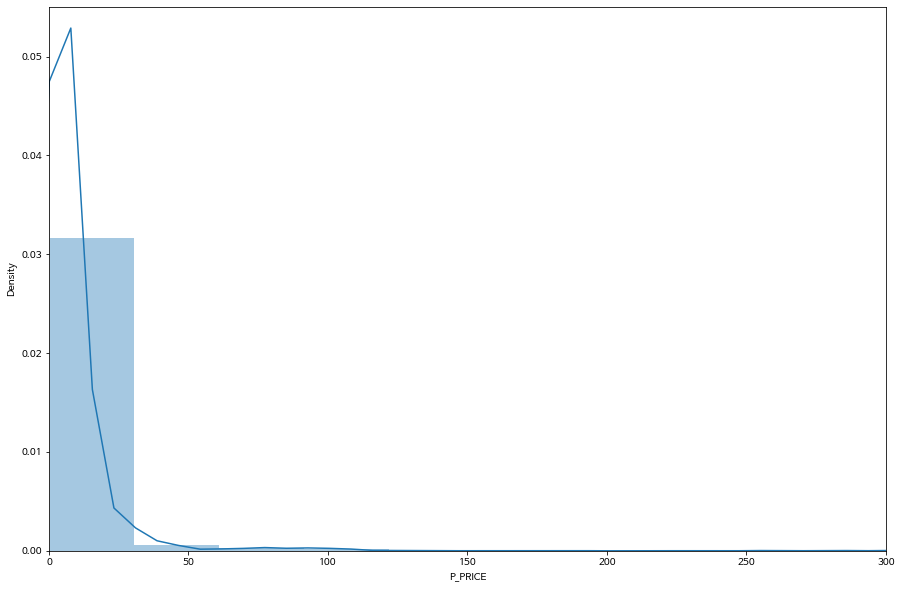

In [21]:
df_copy = df.copy()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.distplot(df_copy['P_PRICE'])
plt.xlim([0, 300])
plt.ylim([0, 0.055])

plt.show()

대부분이 0 ~ 50 사이에 존재

In [22]:
scaler = MinMaxScaler() 
df_copy['P_PRICE'] = scaler.fit_transform(df_copy[['P_PRICE']])

In [23]:
def max_to_min(x):
  return x.max()-x.min()

In [24]:
group1 = df_copy.groupby(['CATEGORY_1'],as_index=False).agg(['max','min',max_to_min,'mean','std'])
group2 = df_copy.groupby(['CATEGORY_2'],as_index=False).agg(['max','min',max_to_min,'mean','std'])
# group2 = df_copy.groupby(['CATEGORY_1','CATEGORY_2'],as_index=False).agg(['max','min',max_to_min,'mean','std'])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

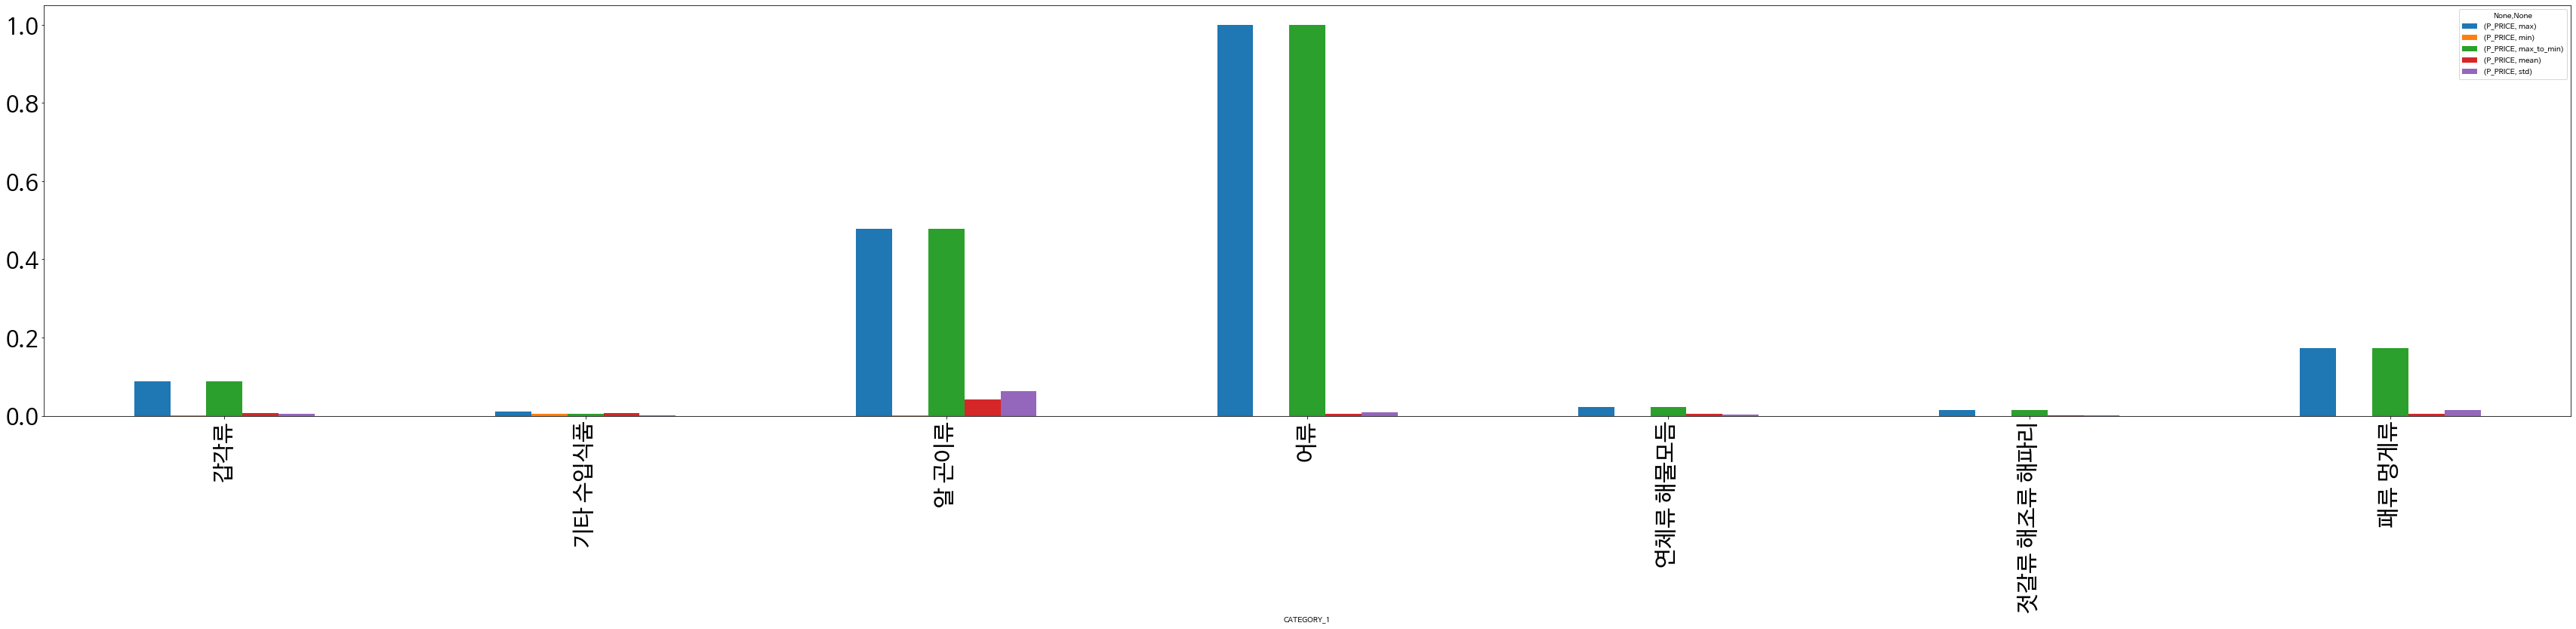

In [25]:
group1.plot(figsize=(60, 10), kind='bar')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

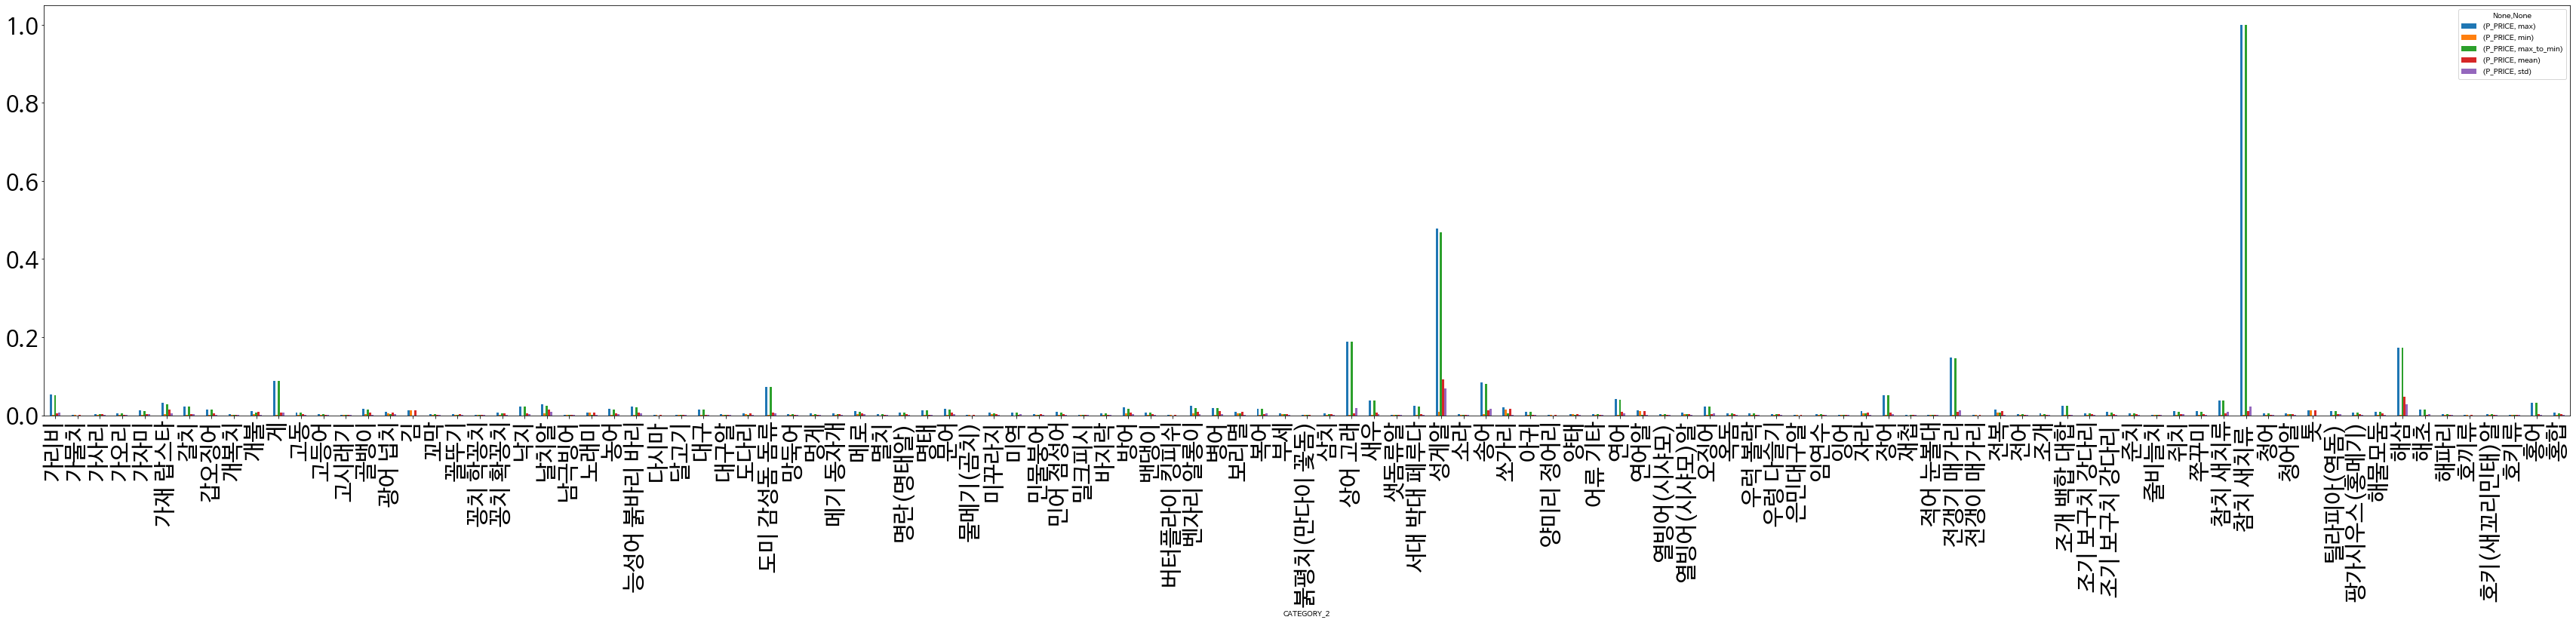

In [26]:
group2.plot(figsize=(60, 10), kind='bar')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

파란색(max) / 초록색(max - min)이 같은 경우 min이 없음

## P_IMPORT_TYPE

In [27]:
# import_type = df['P_IMPORT_TYPE'].str.split(',')

# 데이터 mapping

In [28]:
df_copy = df.copy()

In [29]:
def mapping(data, col):
  kind = list(data[col].unique())
  dict_ = {}
  for idx, name in enumerate(kind):
    dict_[name] = idx + 1

  data[col] = data[col].map(dict_)
  data[col] = data[col].astype('category')
  
  return data

map_list = ['CTRY_1', 'CTRY_2', 'P_PURPOSE', 'CATEGORY_1', 'CATEGORY_2', 'P_NAME']

for i in map_list:
  mapping(data=df_copy, col = i)

df_copy.drop('P_TYPE', axis=1, inplace = True)

In [30]:
df_copy.head()

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,1,1,1,1,1,1,냉동,7.480000
1,2015-12-28,2,2,1,1,2,2,냉동,2.920000
2,2015-12-28,2,2,1,1,2,2,"냉동,절단",3.356352
3,2015-12-28,3,3,1,2,3,3,"건조,자숙",18.260870
4,2015-12-28,4,4,1,3,4,4,냉동,4.791340


In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42073 entries, 0 to 42072
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       42073 non-null  datetime64[ns]
 1   CTRY_1         42073 non-null  category      
 2   CTRY_2         42073 non-null  category      
 3   P_PURPOSE      42073 non-null  category      
 4   CATEGORY_1     42073 non-null  category      
 5   CATEGORY_2     42073 non-null  category      
 6   P_NAME         42073 non-null  category      
 7   P_IMPORT_TYPE  42073 non-null  object        
 8   P_PRICE        42073 non-null  float64       
dtypes: category(6), datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ MB


## 월달러환율

In [32]:
usd = pd.read_csv(usd_path)
usd.head()

,날짜,종가,오픈,고가,저가,변동 %
0,2019년 12월 30일,"1,156.97","1,160.70","1,161.03","1,154.48",-0.17%
1,2019년 12월 27일,"1,158.95","1,162.33","1,162.79","1,158.12",-0.20%
2,2019년 12월 26일,"1,161.30","1,160.76","1,163.52","1,159.65",0.13%
3,2019년 12월 25일,"1,159.76","1,163.52","1,163.81","1,160.71",-0.24%
4,2019년 12월 24일,"1,162.52","1,164.04","1,166.10","1,160.35",-0.04%


In [33]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1046 non-null   object
 1   종가      1046 non-null   object
 2   오픈      1046 non-null   object
 3   고가      1046 non-null   object
 4   저가      1046 non-null   object
 5   변동 %    1046 non-null   object
dtypes: object(6)
memory usage: 49.2+ KB


In [34]:
def step_one(data):
  data.drop('변동 %', axis=1, inplace=True)
  
  for col in list(data.columns):
    if col != '날짜':
      data[col] = data[col].str.replace(',','').astype(float)
    else:
      data[col] = usd[col].str.replace('년','').str.replace('월','').str.replace('일','')
      data[col] = pd.to_datetime(data[col])
      data[col].sort_index(ascending=False, inplace=True)

  return data

def step_two(data):
  data = step_one(data)

  lst = []
  day_df = pd.DataFrame()
  day = data['날짜'][0]

  while len(lst) < df['REG_DATE'].nunique():
    day += timedelta(days=7)
    lst.append(day)

  day_df = day_df.append(lst)

  result = usd.merge(day_df, left_on='날짜',right_on=0)
  result.drop(['오픈','고가','저가',0], axis=1, inplace=True)

  return result

usd = step_two(usd)
usd.columns = ['날짜', '원달러환율']

In [35]:
final = df.merge(usd, left_on='REG_DATE',right_on='날짜')
final.drop('날짜',axis=1, inplace=True)
final.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,원달러환율
0,2016-01-04,수산물,아랍에미리트,아랍에미리트,판매용,어류,갈치,갈치,냉장,5.250215,1163.04
1,2016-01-04,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,3.122023,1163.04
2,2016-01-04,수산물,캐나다,캐나다,판매용,어류,연어,연어,냉장,9.200743,1163.04
3,2016-01-04,수산물,캐나다,캐나다,자사제품제조용,어류,장어,먹장어,냉동,2.700000,1163.04
4,2016-01-04,수산물,칠레,칠레,판매용,어류,연어,은연어,"냉동,필렛(F)",9.400000,1163.04


In [36]:
lst = []
for num in range(len(final)):
  result = (final['P_PRICE'][num] * final['원달러환율'][num])
  lst.append(result)
final['K_PRICE'] = lst

In [37]:
final.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,원달러환율,K_PRICE
0,2016-01-04,수산물,아랍에미리트,아랍에미리트,판매용,어류,갈치,갈치,냉장,5.250215,1163.04,6106.209579
1,2016-01-04,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,3.122023,1163.04,3631.037442
2,2016-01-04,수산물,캐나다,캐나다,판매용,어류,연어,연어,냉장,9.200743,1163.04,10700.832714
3,2016-01-04,수산물,캐나다,캐나다,자사제품제조용,어류,장어,먹장어,냉동,2.700000,1163.04,3140.208000
4,2016-01-04,수산물,칠레,칠레,판매용,어류,연어,은연어,"냉동,필렛(F)",9.400000,1163.04,10932.576000


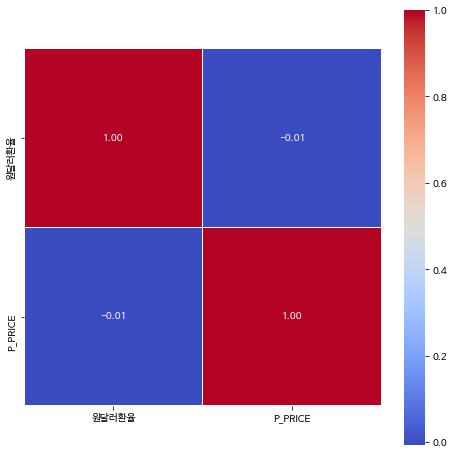

In [38]:
final_copy = final.copy()

corr = final_copy[['원달러환율','P_PRICE']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, fmt='.2f', annot = True, linecolor='white',linewidths=0.2,
            square = True, cmap='coolwarm')

In [39]:
final_ = final.copy()
final_ = final_[['REG_DATE','CATEGORY_1','CATEGORY_2','P_PRICE','원달러환율']]
final_.head()

,REG_DATE,CATEGORY_1,CATEGORY_2,P_PRICE,원달러환율
0,2016-01-04,어류,갈치,5.250215,1163.04
1,2016-01-04,갑각류,게,3.122023,1163.04
2,2016-01-04,어류,연어,9.200743,1163.04
3,2016-01-04,어류,장어,2.700000,1163.04
4,2016-01-04,어류,연어,9.400000,1163.04


In [40]:
g_fin = final_.groupby(['원달러환율','CATEGORY_1'], as_index=False)['P_PRICE'].mean()

In [41]:
g_fin.head()

,원달러환율,CATEGORY_1,P_PRICE
0,1057.16,갑각류,11.041456
1,1057.16,알 곤이류,44.689564
2,1057.16,어류,9.268945
3,1057.16,연체류 해물모듬,7.179364
4,1057.16,젓갈류 해조류 해파리,3.523340


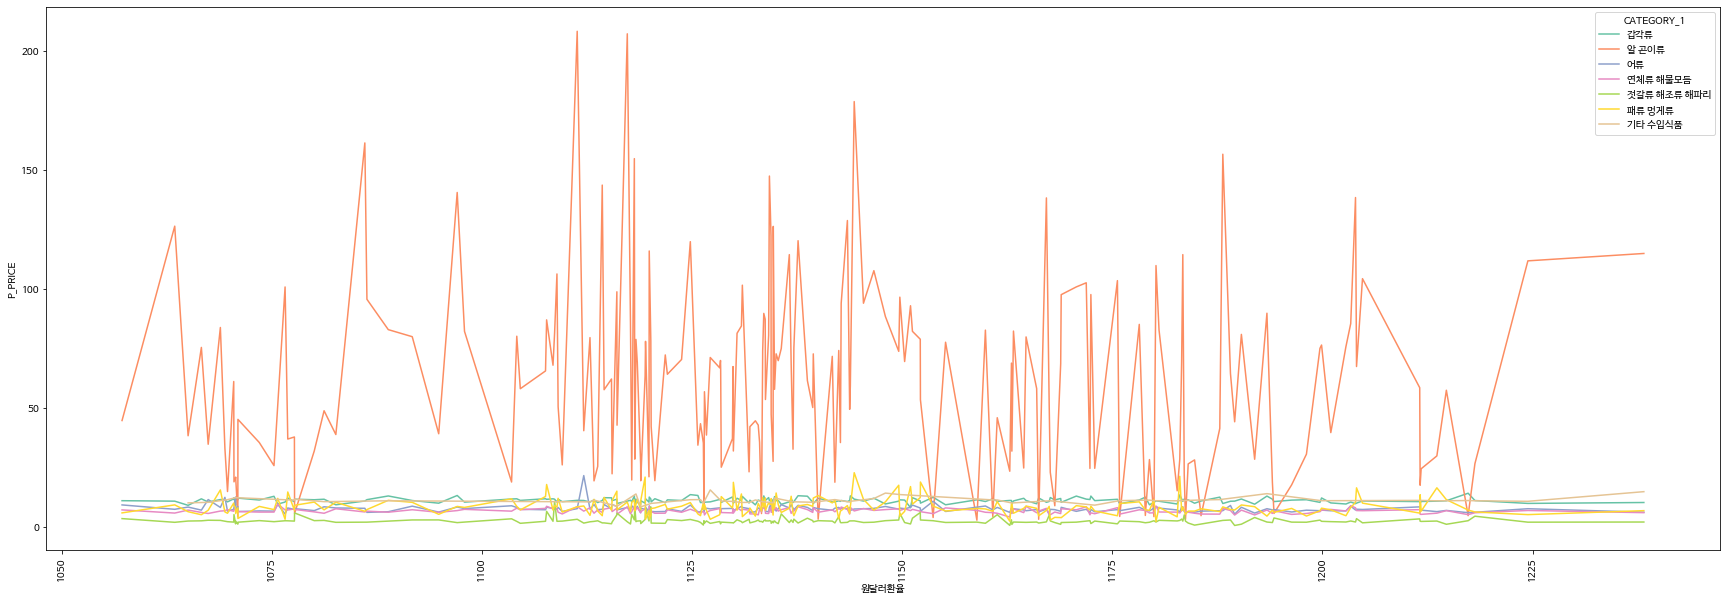

In [42]:
plt.figure(figsize=(30, 10))
sns.lineplot(x = '원달러환율', y='P_PRICE',hue='CATEGORY_1',
           data=g_fin, palette='Set2')
plt.xticks(rotation = 90)
plt.show()